### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Pendulum
Params setup

In [14]:
param_l = 1 #pendulum length
param_m = 1 #pendulum mass
const_g = 9.81
damp_coeff = .0001 #dampening coefficient
delta = .001

init_w = 0
init_tht = 10

Euler method

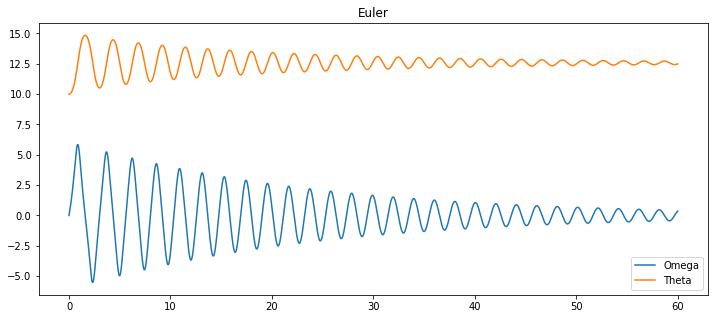

In [19]:
w, tht = init_w, init_tht
ts = np.arange(0, 60, delta)
ews = [init_w]
ethts = [init_tht]

def pend_calc(w_prev, tht_prev):
    w = (w_prev - const_g/param_l*np.sin(tht_prev)*delta)*(1-damp_coeff)
    tht = tht_prev + w_prev*delta #w vs w_prev
    return w, tht

for idx, t in enumerate(ts[1:]):
    w, tht = pend_calc(w, tht)
    ews.append(w)
    ethts.append(tht)

plt.figure(figsize=(12,5))
plt.title("Euler")
plt.plot(ts, ews, label="Omega")
plt.plot(ts, ethts, label="Theta")
plt.legend();

Midpoint method

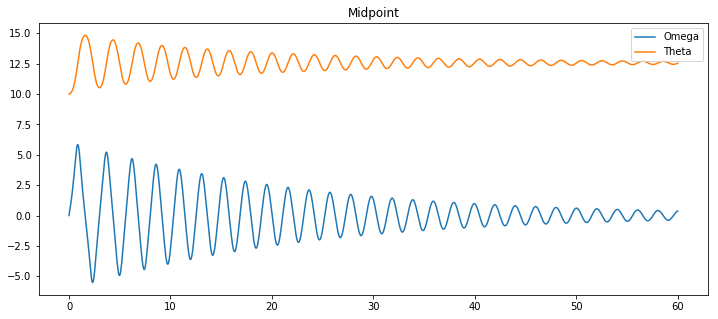

In [20]:
w, tht = init_w, init_tht
ts = np.arange(0, 60, delta)
mws = [init_w]
mthts = [init_tht]

def pend_calc(w_prev, tht_prev):
    k1w = (w_prev + (w_prev - const_g/param_l*np.sin(tht_prev)*delta)*(1-damp_coeff))/2
    w = (k1w + (k1w - const_g/param_l*np.sin(tht_prev)*delta)*(1-damp_coeff))/2
    k1t = (2*tht_prev + w*delta)/2
    tht = (2*k1t + w_prev*delta)/2
    return w, tht

for idx, t in enumerate(ts[1:]):
    w, tht = pend_calc(w, tht)
    mws.append(w)
    mthts.append(tht)

plt.figure(figsize=(12,5))
plt.title("Midpoint")
plt.plot(ts, mws, label="Omega")
plt.plot(ts, mthts, label="Theta")
plt.legend();

4<sup>th</sup> order Runge-Kutta method

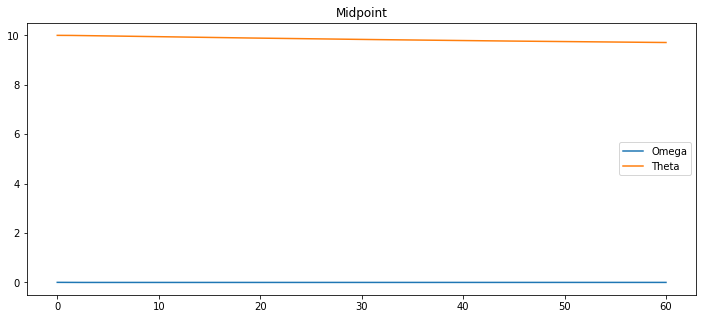

In [23]:
w, tht = init_w, init_tht
ts = np.arange(0, 60, delta)
mws = [init_w]
mthts = [init_tht]

def pend_calc(w_prev, tht_prev):
    k1w = (w_prev - const_g/param_l*np.sin(tht_prev)*delta)*(1-damp_coeff) - w_prev
    k2w = (2*w_prev + k1w)/2
    k3w = (2*w_prev + k2w)/2
    k4w = (k1w - const_g/param_l*np.sin(tht_prev)*delta)*(1-damp_coeff) - k1w
    
    k1t = w_prev
    k2t = (2*w_prev + k1t)/2
    k3t = (2*w_prev + k2t)
    k4t = w_prev + k1w
    
    w = w_prev - delta*(k1w + 2*k2w + 2*k3w + k4w)/6
    tht = tht_prev+ delta*(k1t + 2*k2t + 2*k3t + k4t)/6
    return w, tht

for idx, t in enumerate(ts[1:]):
    w, tht = pend_calc(w, tht)
    mws.append(w)
    mthts.append(tht)

plt.figure(figsize=(12,5))
plt.title("Midpoint")
plt.plot(ts, mws, label="Omega")
plt.plot(ts, mthts, label="Theta")
plt.legend();